In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Training Data

In [2]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Test Data

In [3]:
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

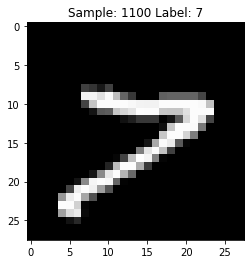

In [5]:
import matplotlib.pyplot as plt
def viz_num(num):
    # Reshape the 768 values to a 28x28 image
    image = X_train.values[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, y_train[num]))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()
viz_num(1100)

Formatting the Data

In [6]:
X_train = X_train/255.0
df_test = df_test/255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)
df_test = df_test.values.reshape(-1, 28, 28, 1)

In [7]:
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [8]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [9]:
y_train = keras.utils.to_categorical(y_train)
y_validation = keras.utils.to_categorical(y_validation)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [11]:
from keras.callbacks import EarlyStopping

In [12]:
early_stopping = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

In [13]:
history = model.fit(x=X_train, y=y_train, batch_size=32,
                   epochs=20, callbacks=[early_stopping],
                   validation_data=(X_validation, y_validation))

2021-11-18 19:24:53.398680: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1050/1050 [==============================] - 28s 26ms/step - loss: 0.1613 - accuracy: 0.9490 - val_loss: 0.0472 - val_accuracy: 0.9844
Epoch 2/20
1050/1050 [==============================] - 27s 25ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0416 - val_accuracy: 0.9868
Epoch 3/20
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0668 - val_accuracy: 0.9804
Epoch 4/20
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 5/20
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0339 - val_accuracy: 0.9904
Epoch 6/20
1050/1050 [==============================] - 27s 25ms/step - loss: 0.0157 - accuracy: 0.9944 - val_loss: 0.0419 - val_accuracy: 0.9899
Epoch 7/20
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.0448 -

In [14]:
score = (max(history.history['val_accuracy']))
print(score)

0.9903571605682373


In [15]:
sample_submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

In [16]:
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [17]:
y_test = model.predict(df_test)
y_test = np.argmax(y_test, axis=1)
y_test

array([2, 0, 9, ..., 3, 9, 2])

In [18]:
submission = pd.DataFrame(columns=['ImageId', 'Label'])

In [19]:
submission['ImageId'] = range(1, 1+len(df_test))
submission['Label'] = y_test

In [20]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [21]:
submission.to_csv('submissions0.csv', index=False)